## K‑Means Clustering and PCA on Synthetic Data

We generate a synthetic dataset with three clusters and apply **K‑Means** clustering.  We then perform **Principal Component Analysis (PCA)** to reduce dimensionality and visualise how the data are distributed along principal directions.  Finally, we assess cluster quality using the silhouette score.


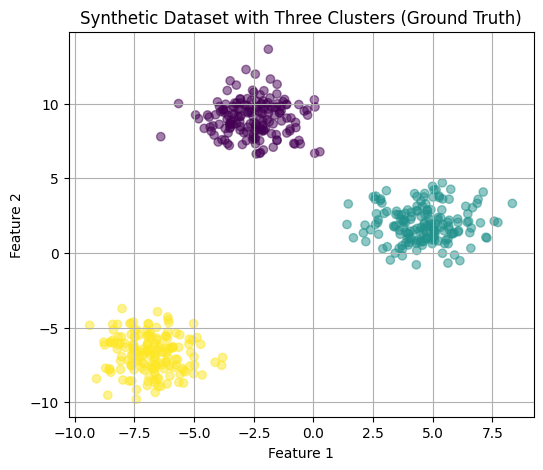

Silhouette Score: 0.812


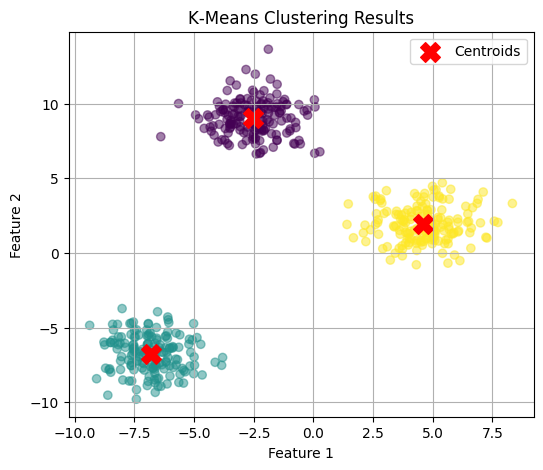

Explained variance of PC1: 74.16%, PC2: 25.84%


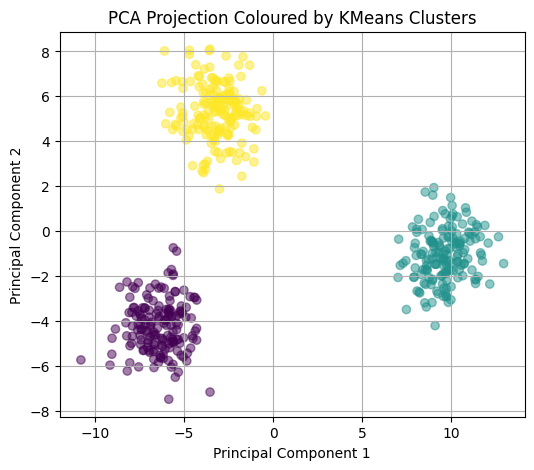

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline

# Generate synthetic dataset
X, true_labels = make_blobs(n_samples=500, centers=3, cluster_std=1.2, random_state=42)

# Scatter plot of the raw data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.5)
plt.title('Synthetic Dataset with Three Clusters (Ground Truth)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Plot KMeans clusters and centroids
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.title('K‑Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance of PC1: {explained_variance[0]:.2%}, PC2: {explained_variance[1]:.2%}")

# Scatter plot of principal components coloured by KMeans clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Projection Coloured by KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


### Interpretation

The synthetic dataset contains three distinct clusters, which K‑Means correctly identifies.  The **silhouette score** quantifies how well each sample fits within its cluster relative to other clusters – values closer to 1 indicate clearer separation.  **PCA** uncovers the directions of maximum variance in the data; here the first two principal components capture a large proportion of the variance, enabling a concise visual summary.

In a business setting, similar techniques help segment customers into homogeneous groups, tailor marketing strategies and detect outliers or fraudulent behaviour.
